In [1]:
import multiprocessing as mp
c = mp.cpu_count()
c

8

In [2]:
import os
import glob
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.edge.options import Options
from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.edge.service import Service
from msedge.selenium_tools import EdgeOptions
import time

os.getcwd()

'/Users/kenta/repo/AMA_teaching/project-06/app'

In [3]:
op = Options()
# op = EdgeOptions()
# op.binary_location = r"/Users/kenta/repo/AMA_teaching/project-06/app/webdriver/msedgedriver"
# op.use_chromium = True
# op.headless = True

op.add_argument("--headless")
op.add_argument("--disable-notifications")

op.add_argument('--disable-infobars')
op.add_argument('--disable-dev-shm-usage')
op.add_argument('--no-sandbox')
op.add_argument('--remote-debugging-port=9222')

In [4]:

cs = Service('./webdriver/chromedriver')
# ms = Service('webdriver/msedgedriver')

cdriver = webdriver.Chrome(executable_path=r'./webdriver/chromedriver',options=op)
# edriver = webdriver.Edge(service=ms, options=op)

In [5]:
CSS_Class = {
    "jobPost": ["sx2jih0 zcydq876 zcydq866 zcydq896 zcydq886 zcydq8n zcydq856 zcydq8f6 zcydq8eu"],
    "title": ["sx2jih0 l3gun70 l3gun74 l3gun72", "h1"],
    "company": ["sx2jih0 zcydq8bm", "span"],
    "location": ["sx2jih0", "span"],
    "jobDetail": ["sx2jih0 zcydq8am zcydq84u", "li"],
    "updateTime": ["sx2jih0 zcydq856 zcydq8eu zcydq8ea zcydq8a6", "time", "datetime"],
    "pagination": ["sx2jih0 zcydq856 zcydq8em"],

}


In [6]:
cdriver.get("https://www.freeproxylists.net/")
soup = cdriver.page_source

<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><!-- InstanceBegin template="/Templates/default.dwt" codeOutsideHTMLIsLocked="false" --><head><script src="https://connect.facebook.net/en_US/sdk.js?hash=4509810a67103d02a05af096ef468423" async="" crossorigin="anonymous"></script><script src="https://apis.google.com/_/scs/apps-static/_/js/k=oz.gapi.en_US.J6wwVzZFlys.O/m=auth/exm=plusone/rt=j/sv=1/d=1/ed=1/am=AQ/rs=AGLTcCNJLWaj6_C-48nmIacOG08UNqZiFA/cb=gapi.loaded_1?le=oz" async=""></script><script type="text/javascript" src="https://m.addthis.com/live/red_lojson/300lo.json?si=62169d5a24bc122a&amp;bkl=0&amp;bl=1&amp;pdt=1102&amp;sid=62169d5a24bc122a&amp;pub=k0tengu&amp;rev=v8.28.8-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.freeproxylists.net&amp;fp=&amp;fr=&amp;of=0&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;mk=proxy%2Cfree%20proxy%2Cproxy%20list&amp;colc=1645649243419&amp;jsl=32&amp;uvs=62169d
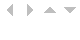

NameError: name 'edriver' is not defined

In [7]:
print(soup)
edriver.quit()

In [12]:
import requests
from lxml.html import fromstring

def get_proxies():
#     url = 'https://free-proxy-list.net/'
#     response = requests.get(url)
    parser = fromstring(soup)
#     print(parser)
    proxies = set()
    list = parser.xpath('/html/body/div[1]/div[2]/table/tbody/tr')
    print(len(list))
    for i in list[1:]:
#         print(i.attrib)
#         print(i.xpath('.//td[1]/a/text()'))
# #         if i.xpath('.//td[7][contains(text(),"yes")]'):
#         #Grabbing IP and corresponding PORT
#         print(i.xpath('.//td[1]/text()'))
        if len(i.attrib) < 2:
            proxy = ":".join([i.xpath('.//td[1]/a/text()')[0], i.xpath('.//td[2]/text()')[0]])
            proxies.add(proxy)
        elif i.attrib["style"]== "height: auto !important;":
            continue
       
    return proxies

In [13]:
proxies = get_proxies()
print(proxies)

53
{'189.90.255.107:8080', '42.2.205.141:8080', '202.124.33.38:8080', '106.15.197.250:8001', '113.53.60.249:8080', '120.24.151.182:22', '171.35.164.119:8085', '58.51.118.146:3128', '178.134.178.134:3128', '5.135.160.119:1618', '41.65.174.36:1981', '125.73.131.137:9091', '36.111.166.135:8888', '101.68.17.90:8085', '202.106.72.238:6666', '36.95.112.53:41890', '117.54.114.33:80', '120.71.148.18:808', '47.241.72.41:80', '58.20.184.187:9091', '123.56.13.137:80', '41.65.174.120:1981', '103.143.195.2:1080', '47.117.136.150:22', '185.46.9.133:3128', '124.158.167.18:8080', '177.32.195.19:3128', '47.100.255.35:80', '167.71.228.163:3128', '51.79.144.52:3128', '201.91.82.155:3128', '103.139.47.250:8080', '175.144.112.239:80', '124.158.88.56:54555', '190.2.210.250:999', '141.51.70.139:8080', '212.46.230.102:6969', '104.149.3.3:8080', '120.71.148.202:8901', '175.144.112.236:80', '41.65.246.3:3129', '41.77.7.234:3129', '120.39.221.140:9001', '103.80.1.2:80', '125.25.45.11:8080', '140.246.87.238:3128'

In [15]:
import requests
from itertools import cycle
import traceback

#If you are copy pasting proxy ips, put in the list below
#proxies = ['121.129.127.209:80', '124.41.215.238:45169', '185.93.3.123:8080', '194.182.64.67:3128', '106.0.38.174:8080', '163.172.175.210:3128', '13.92.196.150:8080']

proxies = get_proxies()
proxy_pool = cycle(proxies)
url = 'https://api.github.com'
# response = requests.get(url)
# print(response.json())

for i in range(1,11):
    #Get a proxy from the pool
    proxy = next(proxy_pool)
    print("Request #%d, using proxy %s"%(i, proxy))
    try:
        response = requests.get(url,proxies={"http": proxy, "https": proxy}, timeout=10)
        print(response.json())
    except:
      #Most free proxies will often get connection errors. You will have retry the entire request using another proxy to work. 
      #We will just skip retries as its beyond the scope of this tutorial and we are only downloading a single url 
        print("Skipping. Connnection error")

53
Request #1, using proxy 189.90.255.107:8080
Skipping. Connnection error
Request #2, using proxy 42.2.205.141:8080
Skipping. Connnection error
Request #3, using proxy 202.124.33.38:8080
Skipping. Connnection error
Request #4, using proxy 106.15.197.250:8001
Skipping. Connnection error
Request #5, using proxy 113.53.60.249:8080
{'current_user_url': 'https://api.github.com/user', 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}', 'authorizations_url': 'https://api.github.com/authorizations', 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}', 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}', 'emails_url': 'https://api.github.com/user/emails', 'emojis_url': 'https://api.github.com/emojis', 'events_url': 'https://api.github.com/events', 'feeds_url': 'https://api.github.com/feeds', 'followers_url': 'https://api.github.com/user/followers', 'fol